<a href="https://colab.research.google.com/github/zangell44/DS-Unit-2-Sprint-1-Linear-Algebra/blob/master/module3-dimensionality-reduction/High_Dimensional_Data_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Vertical Line Test

## 1.1 Create two graphs, one that passes the vertical line test and one that does not.

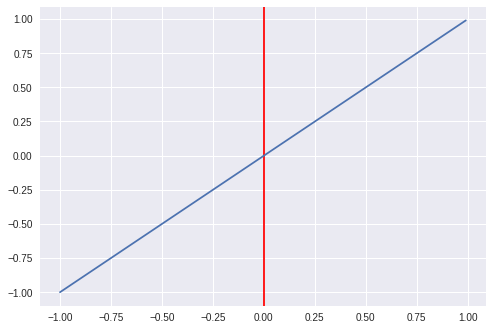

In [22]:
# passes vertical line test
x = np.arange(-1,1,0.01)
y = x

plt.axvline(0, color='red')
plt.plot(x,y)
plt.show()

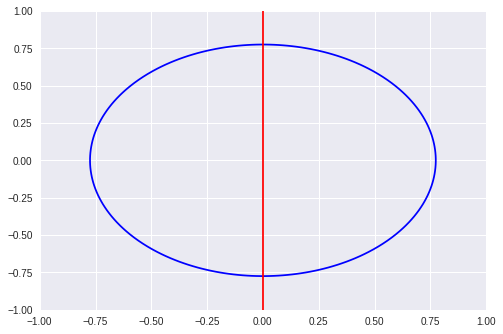

In [23]:
# does not pass vertical line test
x = np.linspace(-1.0, 1.0, 100)
y = np.linspace(-1.0, 1.0, 100)
X, Y = np.meshgrid(x,y)
F = X**2 + Y**2 - 0.6
plt.contour(X,Y,F,[0], colors='blue')

plt.axvline(0, color='red')
plt.show()

## 1.2 Why are graphs that don't pass the vertical line test not considered "functions?"

Those that do not map the vertical line test have multple outputs (y) for a given input value (x). A function has a unique output for each input.

# Functions as Relations

## 2.1 Which of the following relations are functions? Why?

\begin{align}
\text{Relation 1: } \{(1, 2), (3, 2), (1, 3)\}
\\
\text{Relation 2: } \{(1, 3), (2, 3), (6, 7)\}
\\
\text{Relation 3: } \{(9, 4), (2, 1), (9, 6)\}
\\
\text{Relation 4: } \{(6, 2), (8, 3), (6, 4)\}
\\
\text{Relation 5: } \{(2, 6), (2, 7), (2, 4)\}
\end{align}

Relation 2 is the only function. To be a function, there must be a unique output for each input. All other relations specify two or more outputs for a particular input.

# Functions as a mapping between dimensions


## 3.1 for the following functions what is the dimensionality of the domain (input) and codomain (range/output)?

\begin{align}
m(𝑥_1,𝑥_2,𝑥_3)=(x_1+x_2, x_1+x_3, x_2+x_3)
\\
n(𝑥_1,𝑥_2,𝑥_3,𝑥_4)=(x_2^2 + x_3, x_2x_4)
\end{align}

The domain of m has 3 dimensions, and it's output has 3 dimensions.

The domain of n has 4 dimensions, and its output has two dimesnions.

## 3.2 Do you think it's possible to create a function that maps from a lower dimensional space to a higher dimensional space? If so, provide an example.

Yes it is. 

Let's say I have a vector v in $\mathbb{R}^1$

\begin{align} 
v = \begin{bmatrix} 7  \end{bmatrix}
\end{align}

Using a 1 by 2 matrix A to linearly transform V

\begin{align} 
A = \begin{bmatrix} 1 & 2  \end{bmatrix}
\end{align}

\begin{align} 
Av = \begin{bmatrix} 7 & 14  \end{bmatrix}
\end{align}

Now, the real answer depends on what exactly you mean by a 'map', The above will give you something in a higher dimensional space, but the *rank* of the resulting matrix cannot be higher than the original dimensions for any linear transformation.

In [25]:
np.matmul(np.mat('7'), np.mat('1 2'))

matrix([[ 7, 14]])

# Vector Transformations

## 4.1 Plug the corresponding unit vectors into each function. Use the output vectors to create a transformation matrix.

\begin{align}
p(\begin{bmatrix}x_1 \\ x_2 \end{bmatrix}) = \begin{bmatrix} x_1 + 3x_2 \\2 x_2 - x_1 \\  \end{bmatrix}
\\
\\
q(\begin{bmatrix}x_1 \\ x_2 \\ x_3\end{bmatrix}) = \begin{bmatrix} 4x_1 + x_2 + 2x_3 \\2 x_2 - x_1 + 3x_3 \\ 5x_1 - 2x_3 + x_2  \end{bmatrix}
\end{align}

\begin{align}
p(\begin{bmatrix}1\\ 0 \end{bmatrix}) = \begin{bmatrix} 1 + 3(0) \\2 (0) - 1 \\  \end{bmatrix} = \begin{bmatrix} 1 \\ -1\end{bmatrix}
\\
p(\begin{bmatrix}0\\ 1 \end{bmatrix}) = \begin{bmatrix}(0) + 3(1) \\2 (1) - (0) \\  \end{bmatrix}  = \begin{bmatrix} 3 \\ 2\end{bmatrix}
\\
P = \begin{bmatrix} 1 & 3 \\ -1 & 2\end{bmatrix}
\end{align}

\begin{align}
q(\begin{bmatrix}1 \\ 0 \\ 0\end{bmatrix}) = \begin{bmatrix} 4(1) + (0) + 2(0) \\2 (0) - (1) + 3(0)\\ 5(1) - 2(0) + (0)  \end{bmatrix} = \begin{bmatrix} 4 \\ -1 \\ 5 \end{bmatrix}
\\
q(\begin{bmatrix}0 \\ 1 \\ 0\end{bmatrix}) = \begin{bmatrix} 4(0) + (1) + 2(0) \\2 (1) - (0) + 3(0)\\ 5(0) - 2(0) + (1)  \end{bmatrix} = \begin{bmatrix} 1 \\ 2 \\ 1 \end{bmatrix}
\\
q(\begin{bmatrix}0 \\ 0 \\ 1\end{bmatrix}) = \begin{bmatrix} 4(0) + (0) + 2(1) \\2 (0) - (0) + 3(1)\\ 5(0) - 2(1) + (0)  \end{bmatrix} = \begin{bmatrix} 2 \\ 3 \\ -2 \end{bmatrix}
\\
Q = \begin{bmatrix} 4 & 1 & 2 \\ -1 & 2 & 3 \\ 5 & 1 & -2 \end{bmatrix}
\end{align}

## 4.2 Verify that your transformation matrices are correct by choosing an input matrix and calculating the result both via the traditional functions above and also via vector-matrix multiplication.

In [38]:
def p_compute(x1, x2):
  return [x1 + 3*x2, 2*x2 - x1]

def q_compute(x1, x2, x3):
  return [4*x1 + x2 + 2*x3, 2*x2 - x1 + 3*x3, 5*x1 - 2*x3 + x2]

p_input = [1, 2]
q_input = [1, 2, 3]

P = np.mat('1 3; -1 2')
Q = np.mat('4 1 2; -1 2 3; 5 1 -2')

print ('Manual P output:', p_compute(p_input[0], p_input[1]))
print ('P matrix transform:\n', np.matmul(P, np.array(p_input).reshape(-1,1)))

print ('\n')
print ('Manual Q output:', q_compute(q_input[0], q_input[1], q_input[2]))
print ('Q matrix transform:\n', np.matmul(Q, np.array(q_input).reshape(-1,1)))

Manual P output: [7, 3]
P matrix transform:
 [[7]
 [3]]


Manual Q output: [12, 12, 1]
Q matrix transform:
 [[12]
 [12]
 [ 1]]


# Eigenvalues and Eigenvectors

## 5.1 In your own words, give an explanation for the intuition behind eigenvalues and eigenvectors.

Eigenvectors are vectors that do not rotate when a transformation is applied. In more than 2 dimensions, we can think of these vectors as retaining their span after the transformation. An eigenvector is on the same line before and after a transformation.

Eigenvalues measure how much an eigenvector *scales* when a transformation is applied.


# The Curse of Dimensionality

## 6.1 What are some of the challenges of working with high dimensional spaces?

- Computationally intensive to find solutions
- Easy to overfit
- Redundant or irrelavant parameters

## 6.2 What is the rule of thumb for how many observations you should have compared to parameters in your model?

You should have about 5 times as many observations as you have parameters in your model.

# Principal Component Analysis

## 7.1 Load the UCI Machine Learning Repository's [Iris Dataset](https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/d546eaee765268bf2f487608c537c05e22e4b221/iris.csv) and use PCA to isolate the dataset's first and second principal components and plot them on a graph. 

In [41]:
iris = pd.read_csv('https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/d546eaee765268bf2f487608c537c05e22e4b221/iris.csv')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [0]:
# pre-processing
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
X = iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
y = iris['species']
X_std = stdsc.fit_transform(X)

In [0]:
# pca
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
X_pca = pca.fit_transform(X_std)

# # useful function for drawing vectors
# def draw_vector(v0, v1, ax=None):
#     ax = ax or plt.gca()
#     arrowprops=dict(arrowstyle='->',
#                     linewidth=2,
#                     shrinkA=0, shrinkB=0)
#     ax.annotate('', v1, v0, arrowprops=arrowprops)

In [84]:
y.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

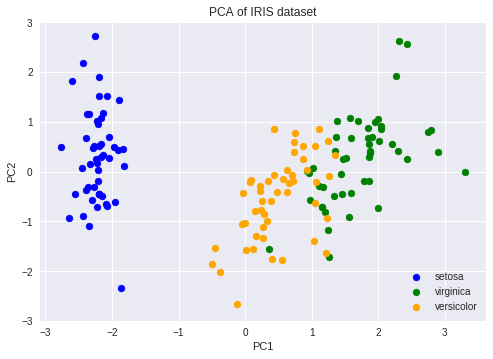

In [92]:
# plotting
y_colors = y.map({'setosa':'blue','virginica' :'green', 'versicolor':'orange'})
y_labels = ['setosa', 'virginica', 'versicolor']
colors = ['blue', 'green', 'orange']

fig_pca, ax_pca = plt.subplots()

# for color, i, target_name in zip(colors, [0, 1, 2], y_labels):
#     ax_pca.scatter(X_pca[y == i, 0], X_pca[y == i, 1], color=color, alpha=.8,
#                 label=y_labels)
    
# ax_pca.legend(loc='best', shadow=False, scatterpoints=1)
ax_pca.set_title('PCA of IRIS dataset')

for color, label in zip(colors, y_labels):
  ax_pca.scatter(X_pca[:,0][y==label], X_pca[:,1][y==label], c=color, label=label)

# ax_pca.set_xlim(-5.0,5.0)
# ax_pca.set_ylim(-5.0,5.0)

ax_pca.set_xlabel('PC1')
ax_pca.set_ylabel('PC2')

ax_pca.legend()

plt.show()

# Stretch Goal

## 1) Do NOT work on the stretch goal until you feel like you have a firm grasp of eigenvectors, eigenvalues, and PCA. Prioritize self-study over the stretch goal if you are not comfortable with those topics yet.

## 2) Explore further the intuition behind eigenvalues and eigenvectors by creating your very own eigenfaces:

<center>![Eigenfaces](https://i.pinimg.com/236x/1c/f1/01/1cf101a9859437a5d096a04b05be06b4--faces-tattoo.jpg)</center>

You don't necessarily have to use this resource, but this will get you started: 
[Eigenface Tutorial](https://sandipanweb.wordpress.com/2018/01/06/eigenfaces-and-a-simple-face-detector-with-pca-svd-in-python/)